In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shoe.csv')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [4]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

In [7]:
df['class(y)'].value_counts()

class(y)
Male      22
Female    18
Name: count, dtype: int64

# label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df['class(y)'] = le.fit_transform(df[['class(y)']])
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


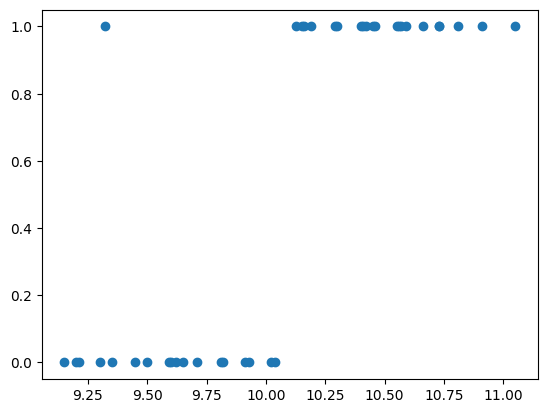

In [10]:
plt.scatter(df[['size(cm)']],df[['class(y)']])

In [11]:
x = df[['size(cm)']]

In [12]:
y = df[['class(y)']]


In [13]:
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [14]:
from sklearn.linear_model import LogisticRegression
reg= LogisticRegression()
reg.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
reg.coef_

array([[2.62700105]])

In [16]:
reg.intercept_

array([-26.18202542])

In [18]:
reg.predict([[9.500]])

array([0])

In [19]:
reg.predict(x)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [21]:
np.array(df['class(y)'])

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [22]:
reg.predict_proba(x)

array([[0.7730327 , 0.2269673 ],
       [0.39738803, 0.60261197],
       [0.23774988, 0.76225012],
       [0.60136241, 0.39863759],
       [0.05487101, 0.94512899],
       [0.89519741, 0.10480259],
       [0.79524978, 0.20475022],
       [0.17003549, 0.82996451],
       [0.66236362, 0.33763638],
       [0.69666466, 0.30333534],
       [0.59504837, 0.40495163],
       [0.23302194, 0.76697806],
       [0.357297  , 0.642703  ],
       [0.07737522, 0.92262478],
       [0.17757917, 0.82242083],
       [0.11860619, 0.88139381],
       [0.46492641, 0.53507359],
       [0.52395788, 0.47604212],
       [0.29398963, 0.70601037],
       [0.16274887, 0.83725113],
       [0.38177164, 0.61822836],
       [0.83473521, 0.16526479],
       [0.88221925, 0.11778075],
       [0.13921733, 0.86078267],
       [0.71305649, 0.28694351],
       [0.21477057, 0.78522943],
       [0.29947158, 0.70052842],
       [0.09833563, 0.90166437],
       [0.21923404, 0.78076596],
       [0.11860619, 0.88139381],
       [0.

In [23]:
reg.score(x,y)

0.925

# decision boundary for logistic regression

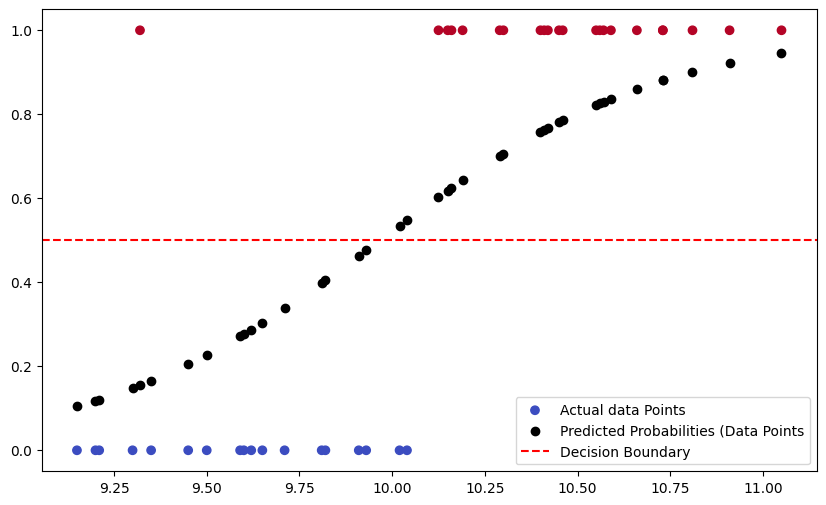

In [30]:
y_prod = reg.predict_proba(x)[:,1]
y_pred = reg.predict(x)

plt.figure(figsize=(10,6))

plt.scatter(x['size(cm)'], y.values.ravel(),c =y.values.ravel(), cmap = 'coolwarm',label = 'Actual data Points')
plt.scatter(x['size(cm)'],y_prod, color = 'black', label = 'Predicted Probabilities (Data Points')
plt.axhline(0.5, color = 'red', linestyle = '--', label = 'Decision Boundary')

plt.title("Decision Boundary Based on Actual Data")
plt.xlabel("Feature: Size (cm)")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()
